<a href="https://colab.research.google.com/github/jenius13/titanic_survival/blob/master/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EC%83%9D%EC%A1%B4%EC%9E%90_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 엑셀 파일 코랩에 업로드

In [2]:
from google.colab import files
uploaded = files.upload()

Saving titanic.xls to titanic (1).xls


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

raw_data = pd.read_excel('titanic.xls')
raw_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [4]:
raw_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


# 생존률 시각화

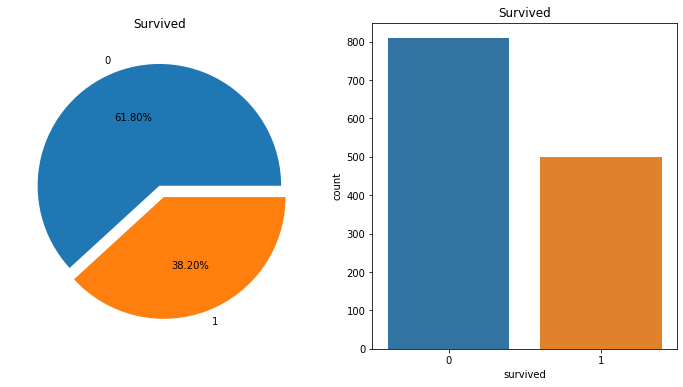

In [5]:
f,ax=plt.subplots(1,2,figsize=(12,6))

raw_data['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0]) #pie 형태그래프
ax[0].set_title('Survived')
ax[0].set_ylabel('') #안쓰면 survived로 초기화됨,title와 같이 똑같이 나옴

sns.countplot('survived',data=raw_data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

# 전체연령확인

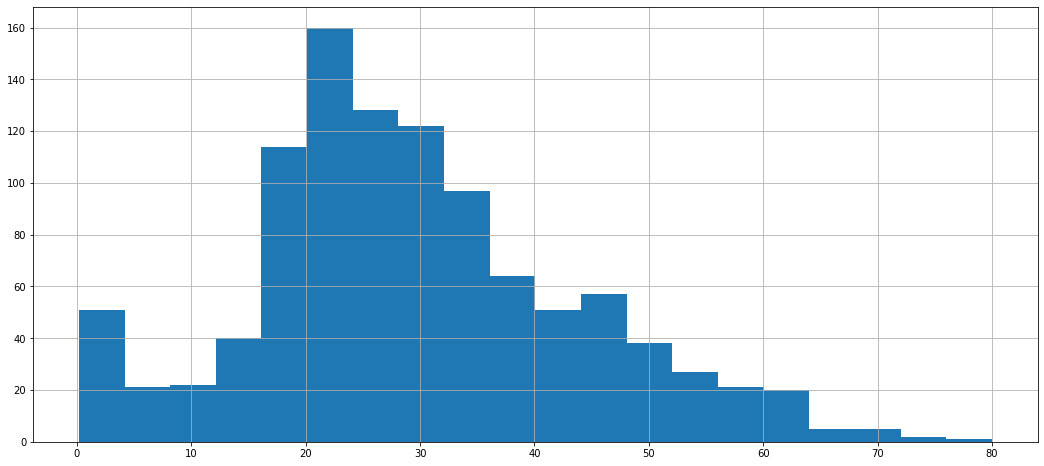

In [6]:
raw_data['age'].hist(bins=20,figsize=(18,8),grid=True)

# 선실 등급별 생존률

In [7]:
raw_data.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


# 데이터 통계적 기초 분석

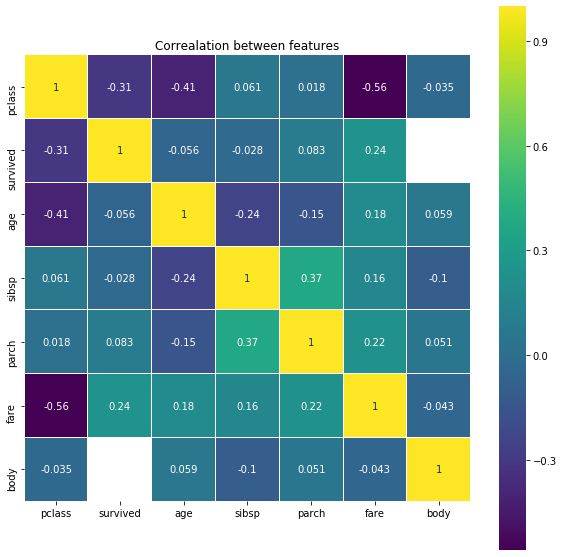

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(raw_data.corr(),linewidths=0.01,square=True,
            annot=True,cmap=plt.cm.viridis,linecolor="white")
plt.title('Correalation between features')
plt.show()

# 음의 상관관계,양의상관관계이든지
# pclass,fare는 Survived와 상관이 있음

# 나이에 따른 그래프 분석

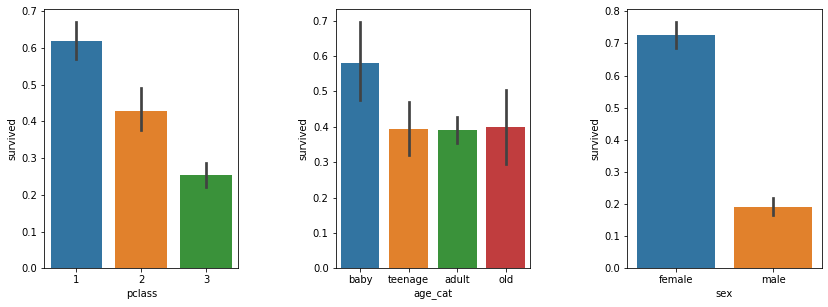

In [9]:
raw_data['age_cat']=pd.cut(raw_data['age'],bins=[0,10,20,50,100],
                           include_lowest=True,labels=['baby','teenage','adult','old'])
plt.figure(figsize=[12,4])
plt.subplot(131)
sns.barplot('pclass','survived',data=raw_data)
plt.subplot(132)
sns.barplot('age_cat','survived',data=raw_data)
plt.subplot(133)
sns.barplot('sex','survived',data=raw_data)
plt.subplots_adjust(top=1,bottom=0.1,left=0.1,right=1,hspace=0.5,wspace=0.5)
plt.show()

# 나이에 따른 생존률 분석

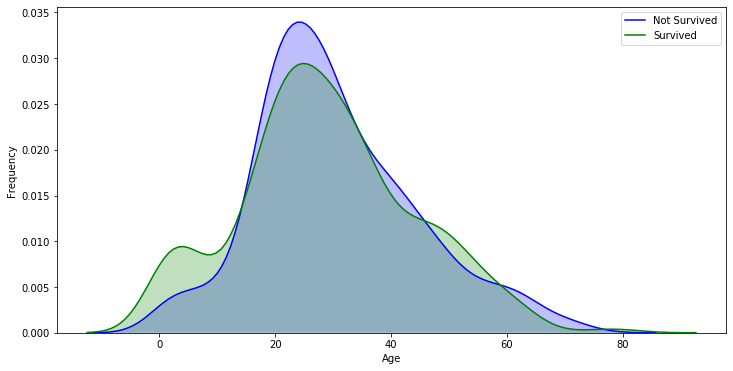

In [10]:
f,ax=plt.subplots(figsize=(12,6))
g=sns.kdeplot(raw_data["age"][(raw_data["survived"]==0)&(raw_data["age"].notnull())],
              ax=ax,color="b",shade=True)
g=sns.kdeplot(raw_data["age"][(raw_data["survived"]==1)&(raw_data["age"].notnull())],
              ax=g,color="g",shade=True)

g.set_xlabel("Age")
g.set_ylabel("Frequency")
g=g.legend(["Not Survived","Survived"])

# 남녀 비율

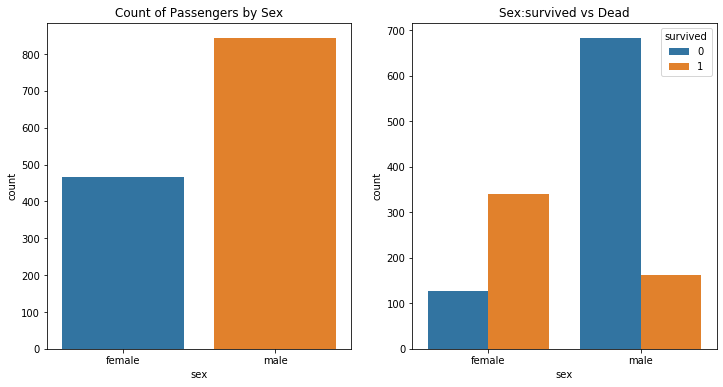

In [11]:
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot('sex',data=raw_data,ax=ax[0])
ax[0].set_title('Count of Passengers by Sex')

sns.countplot('sex',hue='survived',data=raw_data,ax=ax[1])
ax[1].set_title('Sex:survived vs Dead')
plt.show()

# 보트 탑승자 사망비율

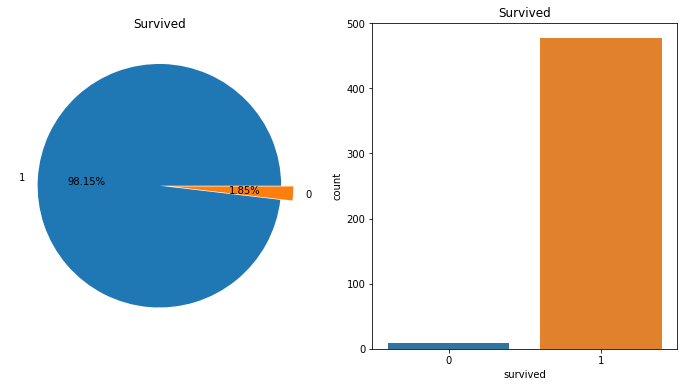

In [12]:
boat_survivors=raw_data[raw_data['boat'].notnull()]
f,ax=plt.subplots(1,2,figsize=(12,6))

boat_survivors['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('survived',data=boat_survivors,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

# 딥러닝을 이용한 생존 가능성 예측

In [13]:
tmp=[]
for each in raw_data['sex']:
  if each=='female':
    tmp.append(1)
  elif each=='male':
    tmp.append(0)
  else:
    tmp.append(np.nan)

raw_data['sex']=tmp

raw_data['survived'] = raw_data['survived'].astype('float')
raw_data['pclass'] = raw_data['pclass'].astype('float')
raw_data['sex'] = raw_data['sex'].astype('float')
raw_data['sibsp'] = raw_data['sibsp'].astype('float')
raw_data['parch'] = raw_data['parch'].astype('float')
raw_data['fare'] = raw_data['fare'].astype('float')

raw_data=raw_data[raw_data['age'].notnull()]
raw_data=raw_data[raw_data['sibsp'].notnull()]
raw_data=raw_data[raw_data['parch'].notnull()]
raw_data=raw_data[raw_data['fare'].notnull()]

raw_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 15 columns):
pclass       1045 non-null float64
survived     1045 non-null float64
name         1045 non-null object
sex          1045 non-null float64
age          1045 non-null float64
sibsp        1045 non-null float64
parch        1045 non-null float64
ticket       1045 non-null object
fare         1045 non-null float64
cabin        272 non-null object
embarked     1043 non-null object
boat         417 non-null object
body         119 non-null float64
home.dest    685 non-null object
age_cat      1045 non-null category
dtypes: category(1), float64(8), object(6)
memory usage: 123.7+ KB


# 신경망 주입 데이터 선별

In [0]:
x_data=raw_data.values[:,[0,3,4,5,6,8]] #x값에 필요한 데이터,(samples,features)
y_data=raw_data.values[:,[1]]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.1,random_state=7)

# 케라스,텐서플로 선언

In [15]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers.core import Dense
np.random.seed(7)

print('tensorflow version : ', tf.__version__)
print('keras version : ', keras.__version__)



tensorflow version :  1.15.0
keras version :  2.2.5


Using TensorFlow backend.


# 신경망 레어이설정

In [16]:
model=Sequential()
model.add(Dense(255,input_shape=(6,),activation='relu'))
model.add(Dense((1),activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='mse',metrics=['acc'])
model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 255)               1785      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 256       
Total params: 2,041
Trainable params: 2,041
Non-trainable params: 0
_________________________________________________________________


# Model to dot을 통한 구조확인

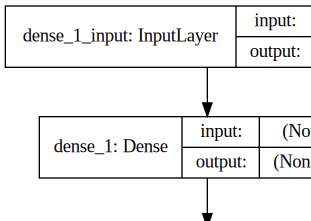

In [17]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model,show_shapes=True).create(prog='dot',format='svg'))

# 학습




Train on 940 samples, validate on 105 samples
Epoch 1/500





940/940 [==============================] - 1s 557us/step - loss: 0.2464 - acc: 0.6532 - val_loss: 0.2882 - val_acc: 0.4190
Epoch 2/500
940/940 [==============================] - 0s 37us/step - loss: 0.2323 - acc: 0.6457 - val_loss: 0.2359 - val_acc: 0.6857
Epoch 3/500
940/940 [==============================] - 0s 38us/step - loss: 0.2091 - acc: 0.7011 - val_loss: 0.2026 - val_acc: 0.7333
Epoch 4/500
940/940 [==============================] - 0s 43us/step - loss: 0.2040 - acc: 0.7011 - val_loss: 0.1870 - val_acc: 0.7619
Epoch 5/500
940/940 [==============================] - 0s 39us/step - loss: 0.1978 - acc: 0.7053 - val_loss: 0.1717 - val_acc: 0.7714
Epoch 6/500
940/940 [==============================] - 0s 42us/step - loss: 0.1898 - acc: 0.7277 - val_loss: 0.1824 - val_acc: 0.7333
Epoch 7/500
940/940 [==============================] - 0s 43us/step - loss: 0.1844 - acc: 0.7234 - val_loss: 0.1666 - val_acc: 0.7810
Epoch 8

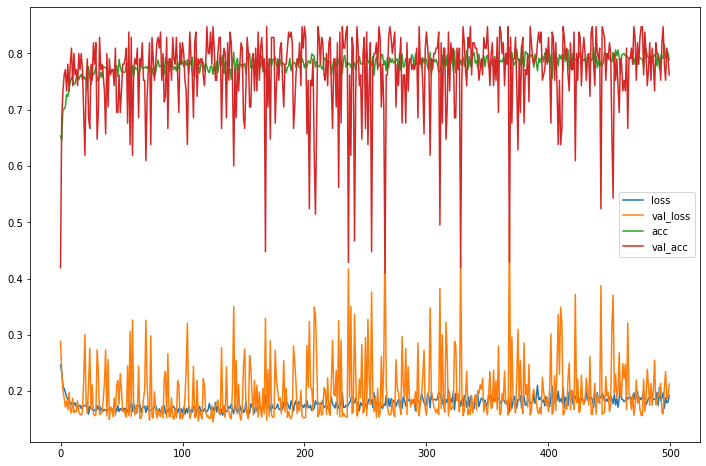

In [18]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=500)

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['loss','val_loss', 'acc','val_acc'])
plt.show()



# 디카프리오,케이트 윈슬렛의 생존확률을 계산해보자

In [0]:
dicaprio=np.array([3.,0.,19.,0.,0.,5.]).reshape(1,6)
#3등실,남자,19살,형제없음,부모없음,싼가격표

winslet=np.array([1.,1.,17.,1.,2.,100.]).reshape(1,6)
#1등실,여자,17살,부모,약혼자,비싼가격



In [20]:
model.predict(dicaprio)

array([[0.00992849]], dtype=float32)

In [21]:
model.predict(winslet)

array([[1.]], dtype=float32)